In [1]:
import numpy as np

from src.state import CouriersGeneticAlgorithmState
from src.baseline import BaselineGeneticAlgorithm
from src.mutations import courier_mutation
from src.crossovers import courier_2_parents_crossover
from src.cost_func import DistanceCost

In [2]:
POPULATION_SIZE = 1000
CAPACITY = [2500, 2000, 1000, 500]
DEMAND = [0, 100, 100, 200, 400, 200, 400, 800, 800, 100, 200, 100, 200, 400, 400, 800, 800]
RANDOM_STATE = 100

SALARY = [100, 100, 100, 100]
DIST_MATRIX = [
    [0, 5.48, 7.76, 6.96, 5.82, 2.74, 5.02, 1.94, 3.08, 1.94, 5.36, 5.02, 3.88, 3.54, 4.68, 7.76, 6.62],
    [5.48, 0, 6.84, 3.08, 1.94, 5.02, 7.30, 3.54, 6.96, 7.42, 10.84, 5.94, 4.80, 6.74, 10.16, 8.68, 12.10],
    [7.76, 6.84, 0, 9.92, 8.78, 5.02, 2.74, 8.10, 4.68, 7.42, 4.00, 12.78, 11.64, 11.30, 7.88, 15.52, 7.54],
    [6.96, 3.08, 9.92, 0, 1.14, 6.50, 8.78, 5.02, 8.44, 8.90, 12.32, 5.14, 6.28, 8.22, 11.64, 5.60, 13.58],
    [5.82, 1.94, 8.78, 1.14, 0, 5.36, 7.64, 3.88, 7.30, 7.76, 11.18, 4.00, 5.14, 7.08, 10.50, 6.74, 12.44],
    [2.74, 5.02, 5.02, 6.50, 5.36, 0, 2.28, 3.08, 1.94, 2.40, 5.82, 7.76, 6.62, 6.28, 5.14, 10.50, 7.08],
    [5.02, 7.30, 2.74, 8.78, 7.64, 2.28, 0, 5.36, 1.94, 4.68, 3.54, 10.04, 8.90, 8.56, 5.14, 12.78, 4.80],
    [1.94, 3.54, 8.10, 5.02, 3.88, 3.08, 5.36, 0, 3.42, 3.88, 7.30, 4.68, 3.54, 3.20, 6.62, 7.42, 8.56],
    [3.08, 6.96, 4.68, 8.44, 7.30, 1.94, 1.94, 3.42, 0, 2.74, 3.88, 8.10, 6.96, 6.62, 3.20, 10.84, 5.14],
    [1.94, 7.42, 7.42, 8.90, 7.76, 2.40, 4.68, 3.88, 2.74, 0, 3.42, 5.36, 4.22, 3.88, 2.74, 8.10, 4.68],
    [5.36, 10.84, 4.00, 12.32, 11.18, 5.82, 3.54, 7.30, 3.88, 3.42, 0, 8.78, 7.64, 7.30, 3.88, 11.52, 3.54],
    [5.02, 5.94, 12.78, 5.14, 4.00, 7.76, 10.04, 4.68, 8.10, 5.36, 8.78, 0, 1.14, 3.08, 6.50, 2.74, 8.44],
    [3.88, 4.80, 11.64, 6.28, 5.14, 6.62, 8.90, 3.54, 6.96, 4.22, 7.64, 1.14, 0, 1.94, 5.36, 3.88, 7.30],
    [3.54, 6.74, 11.30, 8.22, 7.08, 6.28, 8.56, 3.20, 6.62, 3.88, 7.30, 3.08, 1.94, 0, 3.42, 4.22, 5.36],
    [4.68, 10.16, 7.88, 11.64, 10.50, 5.14, 5.14, 6.62, 3.20, 2.74, 3.88, 6.50, 5.36, 3.42, 0, 7.64, 1.94],
    [7.76, 8.68, 15.52, 5.60, 6.74, 10.50, 12.78, 7.42, 10.84, 8.10, 11.52, 2.74, 3.88, 4.22, 7.64, 0, 7.98],
    [6.62, 12.10, 7.54, 13.58, 12.44, 7.08, 4.80, 8.56, 5.14, 4.68, 3.54, 8.44, 7.30, 5.36, 1.94, 7.98, 0]
]

In [3]:
current_state = CouriersGeneticAlgorithmState(
    capacity=CAPACITY,
    demand=DEMAND,
    population_size=POPULATION_SIZE,
    random_state=RANDOM_STATE
)

2024-04-03 13:05:01.112 | INFO     | src.state:__init__:77 - Average Num retries: 5.6320000000002155


In [4]:
cost_function = DistanceCost(
    salary=SALARY,
    dist_matrix=DIST_MATRIX,
)

algo = BaselineGeneticAlgorithm(
    state=current_state,
    eval_function=cost_function,
    mutation_function=courier_mutation,
    mating_function=courier_2_parents_crossover,
)

In [5]:
cur_best = algo.get_best()

cost_function(cur_best)

8764.0

In [6]:
algo.select(keep_share=0.5)
algo.mate()
algo.mutate(delta=5)

cur_best = algo.get_best()

cur_best

[[3, 15, 11, 16, 14, 10], [8, 1, 4, 2, 5, 6], [7, 12], [13, 9]]

In [7]:
cost_function(cur_best)

8672.0

100%|██████████| 49/49 [05:22<00:00,  6.58s/it]


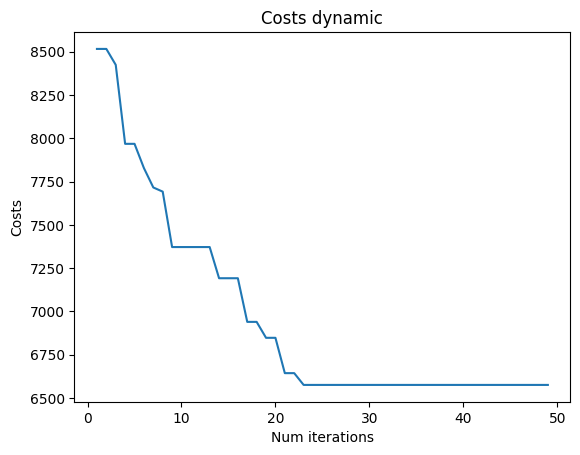

In [8]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from loguru import logger

num_iterations = 50

prev_best_cost = 10000000

scores = []
for i in tqdm(range(1, num_iterations)):
    algo.select(keep_share=0.5)
    algo.mate()
    algo.mutate(delta=5)

    cur_best = algo.get_best()

    cur_best_cost = cost_function(cur_best)
    scores.append(cur_best_cost)
    if cur_best_cost != prev_best_cost:
        prev_best_cost = cur_best_cost

x = np.arange(1, num_iterations)
y = np.array(scores)

plt.plot(x, y)
plt.title("Costs dynamic")
plt.xlabel("Num iterations")
plt.ylabel("Costs")
plt.show()

In [9]:
f"Score after {i} iterations: {cur_best_cost}. Best: {cur_best}"

'Score after 49 iterations: 6576.0. Best: [[16, 10, 2, 6, 8, 5], [13, 11, 15, 3, 4, 1], [12, 7], [9, 14]]'